In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


df = pd.read_csv('BITCION HISTORICAL DATA.csv',index_col=0,parse_dates=['Date'])

In [2]:
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-10-03,"47,878.90","47,665.40","48,097.00","47,123.00",36.99K,0.44%
2021-10-02,"47,666.90","48,147.20","48,306.90","47,451.70",39.82K,-1.00%
2021-10-01,"48,146.00","43,824.40","48,435.20","43,292.90",94.66K,9.86%
2021-09-30,"43,823.30","41,534.50","44,101.20","41,416.70",64.32K,5.50%
2021-09-29,"41,536.80","41,023.10","42,571.20","40,815.00",48.21K,1.25%
...,...,...,...,...,...,...
2021-04-07,"55,948.70","57,996.30","58,627.70","55,489.30",110.69K,-3.53%
2021-04-06,"57,996.30","59,169.00","59,487.00","57,403.30",77.15K,-1.69%
2021-04-05,"58,993.40","58,202.30","59,205.10","56,842.70",54.13K,1.36%


In [3]:
# The float values are in strings so we need to convert it to float
df.describe()

,Price,Open,High,Low,Vol.,Change %
count,184,184,184,184,184,184
unique,184,183,184,184,182,174
top,"33,113.00","37,294.30","42,758.80","56,110.50",84.08K,-0.58%
freq,1,2,1,1,2,2


In [4]:
print(type(df['Price'][0]))

<class 'str'>


In [5]:
# Remove K and % from last two columns to perform numeric operations onto it

# The numeric data which is of string type is converted to float type and also K n % will be removed/  
data1 = df.replace('[^\d.]','', regex=True).astype(float)

In [6]:
data1

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-10-03,47878.9,47665.4,48097.0,47123.0,36.99,0.44
2021-10-02,47666.9,48147.2,48306.9,47451.7,39.82,1.00
2021-10-01,48146.0,43824.4,48435.2,43292.9,94.66,9.86
2021-09-30,43823.3,41534.5,44101.2,41416.7,64.32,5.50
2021-09-29,41536.8,41023.1,42571.2,40815.0,48.21,1.25
...,...,...,...,...,...,...
2021-04-07,55948.7,57996.3,58627.7,55489.3,110.69,3.53
2021-04-06,57996.3,59169.0,59487.0,57403.3,77.15,1.69
2021-04-05,58993.4,58202.3,59205.1,56842.7,54.13,1.36


In [7]:
data1.describe()

,Price,Open,High,Low,Vol.,Change %
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,44094.455435,44159.960870,45408.586957,42613.350000,104.772554,3.216522
std,8696.045489,8758.677949,8803.956810,8667.195031,67.449001,2.878406
min,29793.800000,29794.700000,31040.800000,28901.800000,0.260000,0.000000
25%,35829.875000,35828.300000,37798.000000,34730.900000,64.665000,1.000000
50%,43808.050000,43809.650000,45527.500000,42579.050000,87.345000,2.355000
75%,49339.050000,49431.775000,50561.175000,48314.450000,123.027500,4.532500
max,63540.900000,63544.200000,64778.000000,62067.500000,607.100000,14.400000


In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 184 entries, 2021-10-03 to 2021-04-03
Data columns (total 6 columns):
Price       184 non-null float64
Open        184 non-null float64
High        184 non-null float64
Low         184 non-null float64
Vol.        184 non-null float64
Change %    184 non-null float64
dtypes: float64(6)
memory usage: 15.1 KB


In [9]:
data1.loc[data1['Price'] < data1['Open'] , 'Buy'] = 0
data1.loc[data1['Price'] > data1['Open'] , 'Buy'] = 1

In [10]:
data1

,Price,Open,High,Low,Vol.,Change %,Buy
Date,,,,,,,
2021-10-03,47878.9,47665.4,48097.0,47123.0,36.99,0.44,1.0
2021-10-02,47666.9,48147.2,48306.9,47451.7,39.82,1.00,0.0
2021-10-01,48146.0,43824.4,48435.2,43292.9,94.66,9.86,1.0
2021-09-30,43823.3,41534.5,44101.2,41416.7,64.32,5.50,1.0
2021-09-29,41536.8,41023.1,42571.2,40815.0,48.21,1.25,1.0
...,...,...,...,...,...,...,...
2021-04-07,55948.7,57996.3,58627.7,55489.3,110.69,3.53,0.0
2021-04-06,57996.3,59169.0,59487.0,57403.3,77.15,1.69,0.0
2021-04-05,58993.4,58202.3,59205.1,56842.7,54.13,1.36,1.0


In [11]:
data1.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
Buy         0
dtype: int64

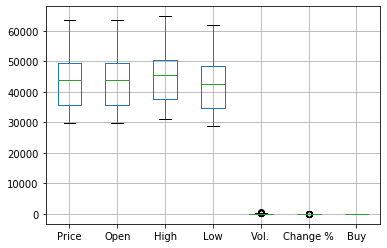

In [12]:
data1.boxplot()

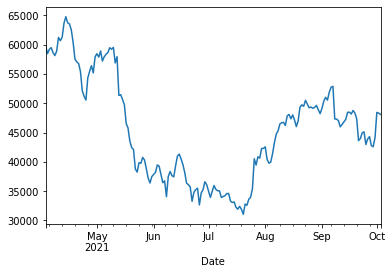

In [13]:
ax = data1['High'].plot(style=['-'])

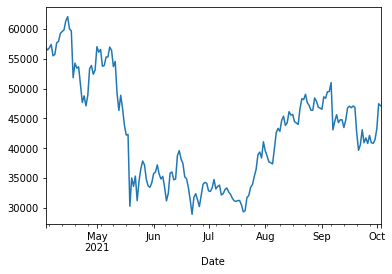

In [14]:
ax = data1['Low'].plot(style=['-'])

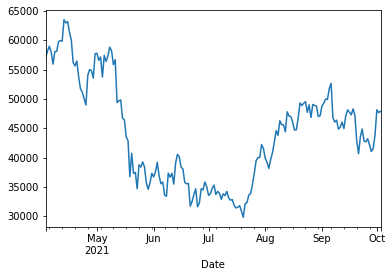

In [15]:
ax = data1['Price'].plot(style=['-'])

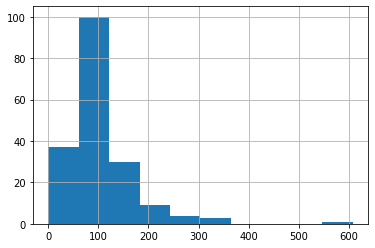

In [16]:
data1['Vol.'].hist()

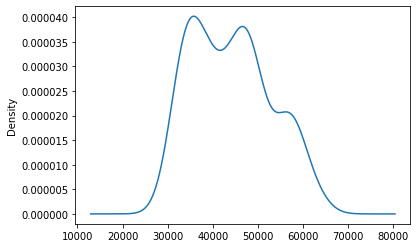

In [17]:
# Kernel Distribution
ax = data1['Price'].plot(kind= 'kde')

C:\Users\omkar\anacondanew\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)


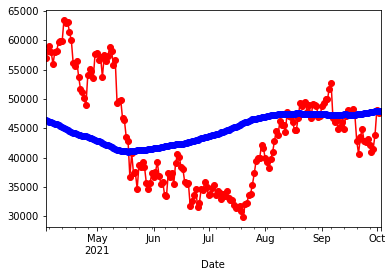

In [18]:
# exponential smoothing 

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(data1['Price']).fit(smoothing_level=.01, optimized = False)

data1['Price'].plot(marker='o', color='red')
model.fittedvalues.plot(marker='o', color='blue')

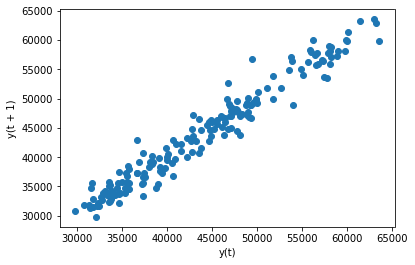

In [19]:
# Randomness in the Price Column
from pandas.plotting import lag_plot
lag_plot(data1['Price'])

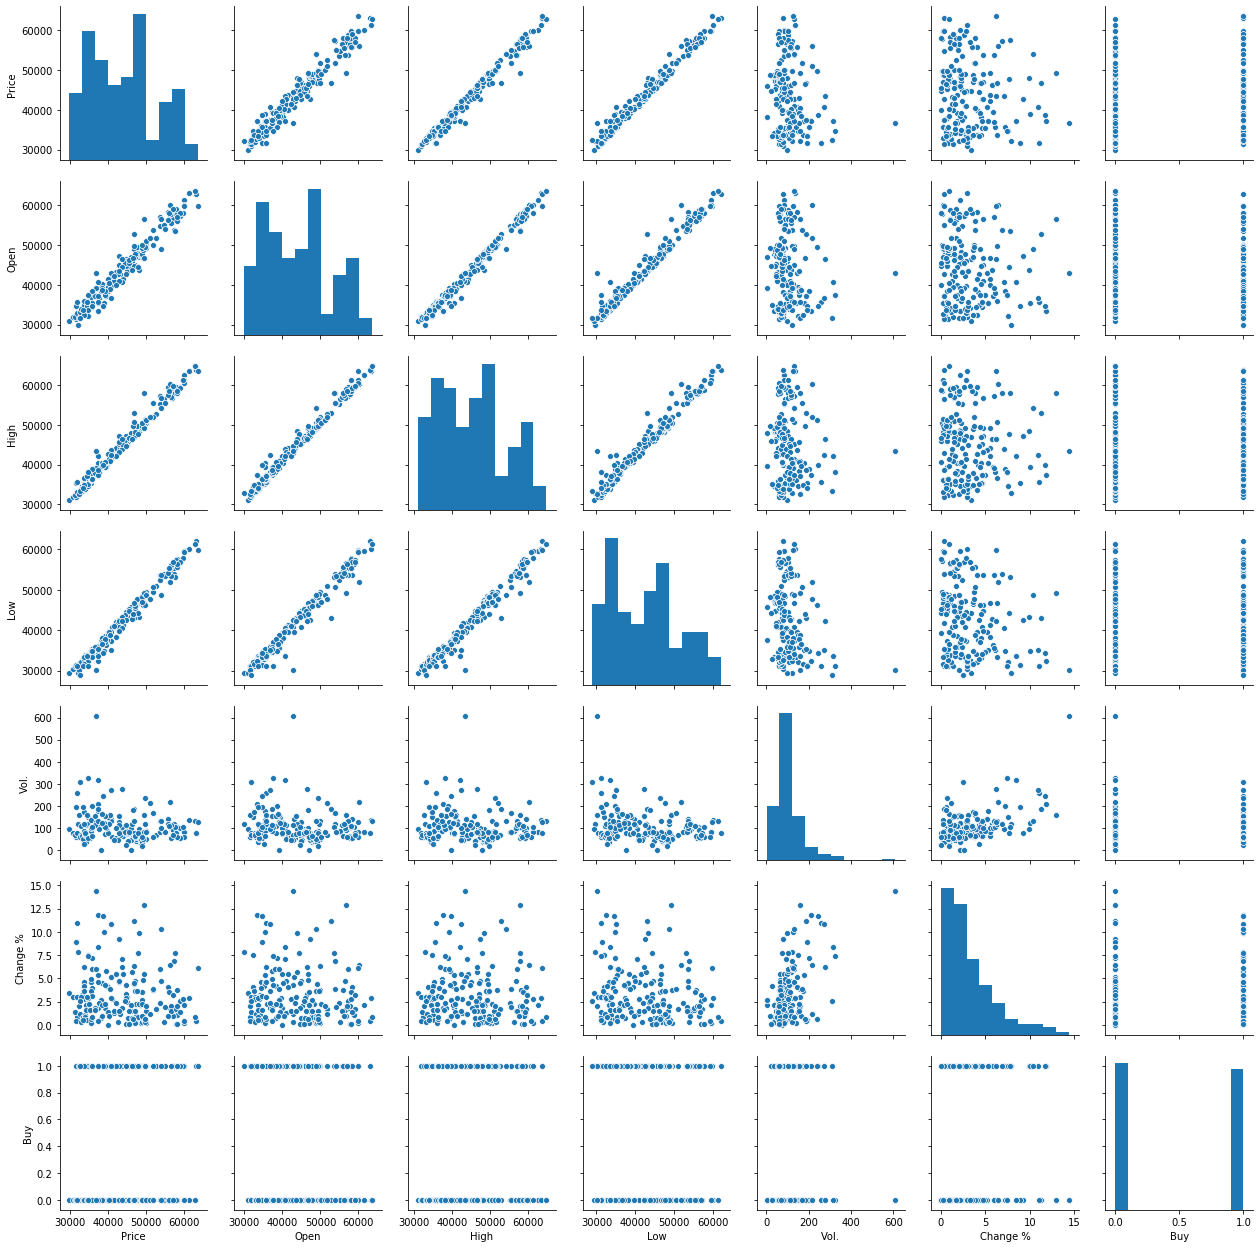

In [20]:
sns.pairplot(data=data1)